In [1]:
print('Hello, help me!')

Hello, help me!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

In [2]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
countries = data.country.unique()
len(countries)

169

In [9]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


(array([ 45.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,   1., 118.]),
 array([1.0000e+00, 1.9590e+02, 3.9080e+02, 5.8570e+02, 7.8060e+02,
        9.7550e+02, 1.1704e+03, 1.3653e+03, 1.5602e+03, 1.7551e+03,
        1.9500e+03]),
 <BarContainer object of 10 artists>)

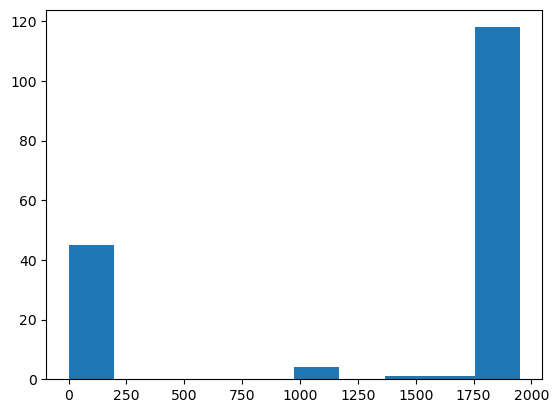

In [10]:
plt.hist(country_years.min_year)

In [19]:
country_years[(1500 < country_years['min_year']) & (country_years['min_year'] <1800)]

,min_year,max_year
country,,
Cuba,1690,2018


In [15]:
country_years['min_year'] 

country
Afghanistan             1820
Angola                  1950
Albania                    1
United Arab Emirates    1950
Argentina               1800
                        ... 
Yemen                   1820
Former Yugoslavia          1
South Africa               1
Zambia                  1950
Zimbabwe                1950
Name: min_year, Length: 169, dtype: int64

In [20]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

In [21]:
code_to_name

,country
countrycode,
AFG,Afghanistan
AGO,Angola
ALB,Albania
ARE,United Arab Emirates
ARG,Argentina
...,...
YEM,Yemen
YUG,Former Yugoslavia
ZAF,South Africa


In [26]:
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')

In [29]:
gdp_pc_timeseries = gdp_pc.unstack('year')
gdp_pc_timeseries

countrycode  year
AFG          1             NaN
             730           NaN
             1000          NaN
             1090          NaN
             1120          NaN
                       ...    
ZWE          2014    1594.0000
             2015    1560.0000
             2016    1534.0000
             2017    1582.3662
             2018    1611.4052
Length: 130468, dtype: float64

In [30]:
gdp_pc.tail()


countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


In [35]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

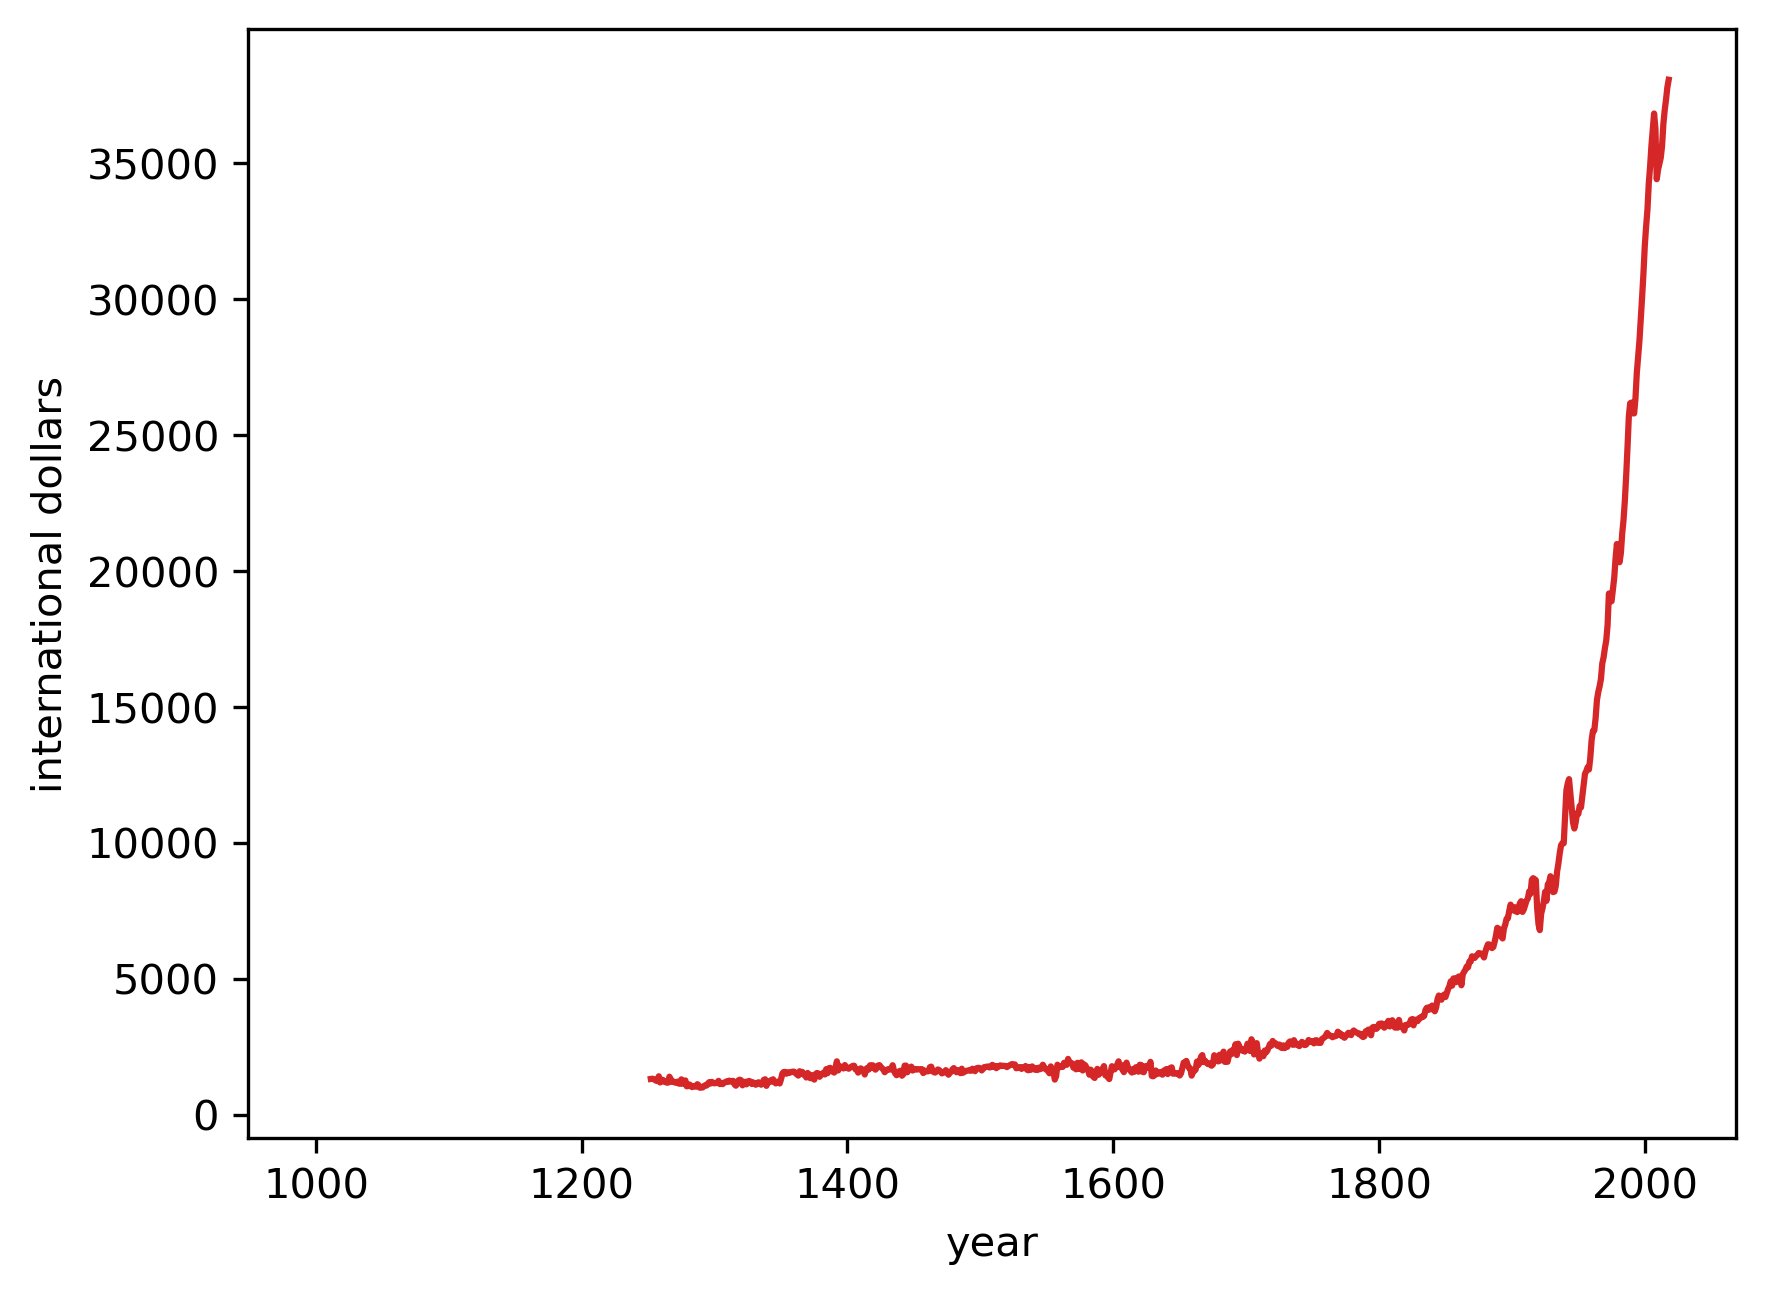

In [36]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
gdp_pc[country].plot(
        ax=ax,
        ylabel='international dollars',
        xlabel='year',
        color=color_mapping[country]
    );

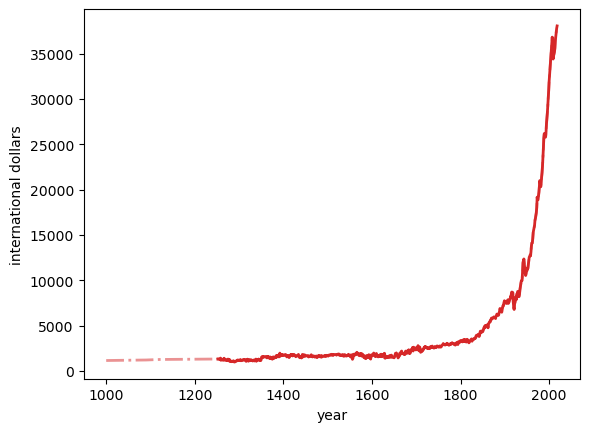

In [46]:
fig, ax = plt.subplots(dpi=100)
country = 'GBR'
ax.plot(gdp_pc[country].interpolate(),
        linestyle='-.',
        lw=2,
        alpha = .5,
        color=color_mapping[country])

ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])
ax.set_ylabel('international dollars')
ax.set_xlabel('year')
plt.show()

In [47]:
def draw_interp_plots(series,        # pandas series
                      country,       # list of country codes
                      ylabel,        # label for y-axis
                      xlabel,        # label for x-axis
                      color_mapping, # code-color mapping
                      code_to_name,  # code-name mapping
                      lw,            # line width
                      logscale,      # log scale for y-axis
                      ax             # matplolib axis
                     ):

    for c in country:
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

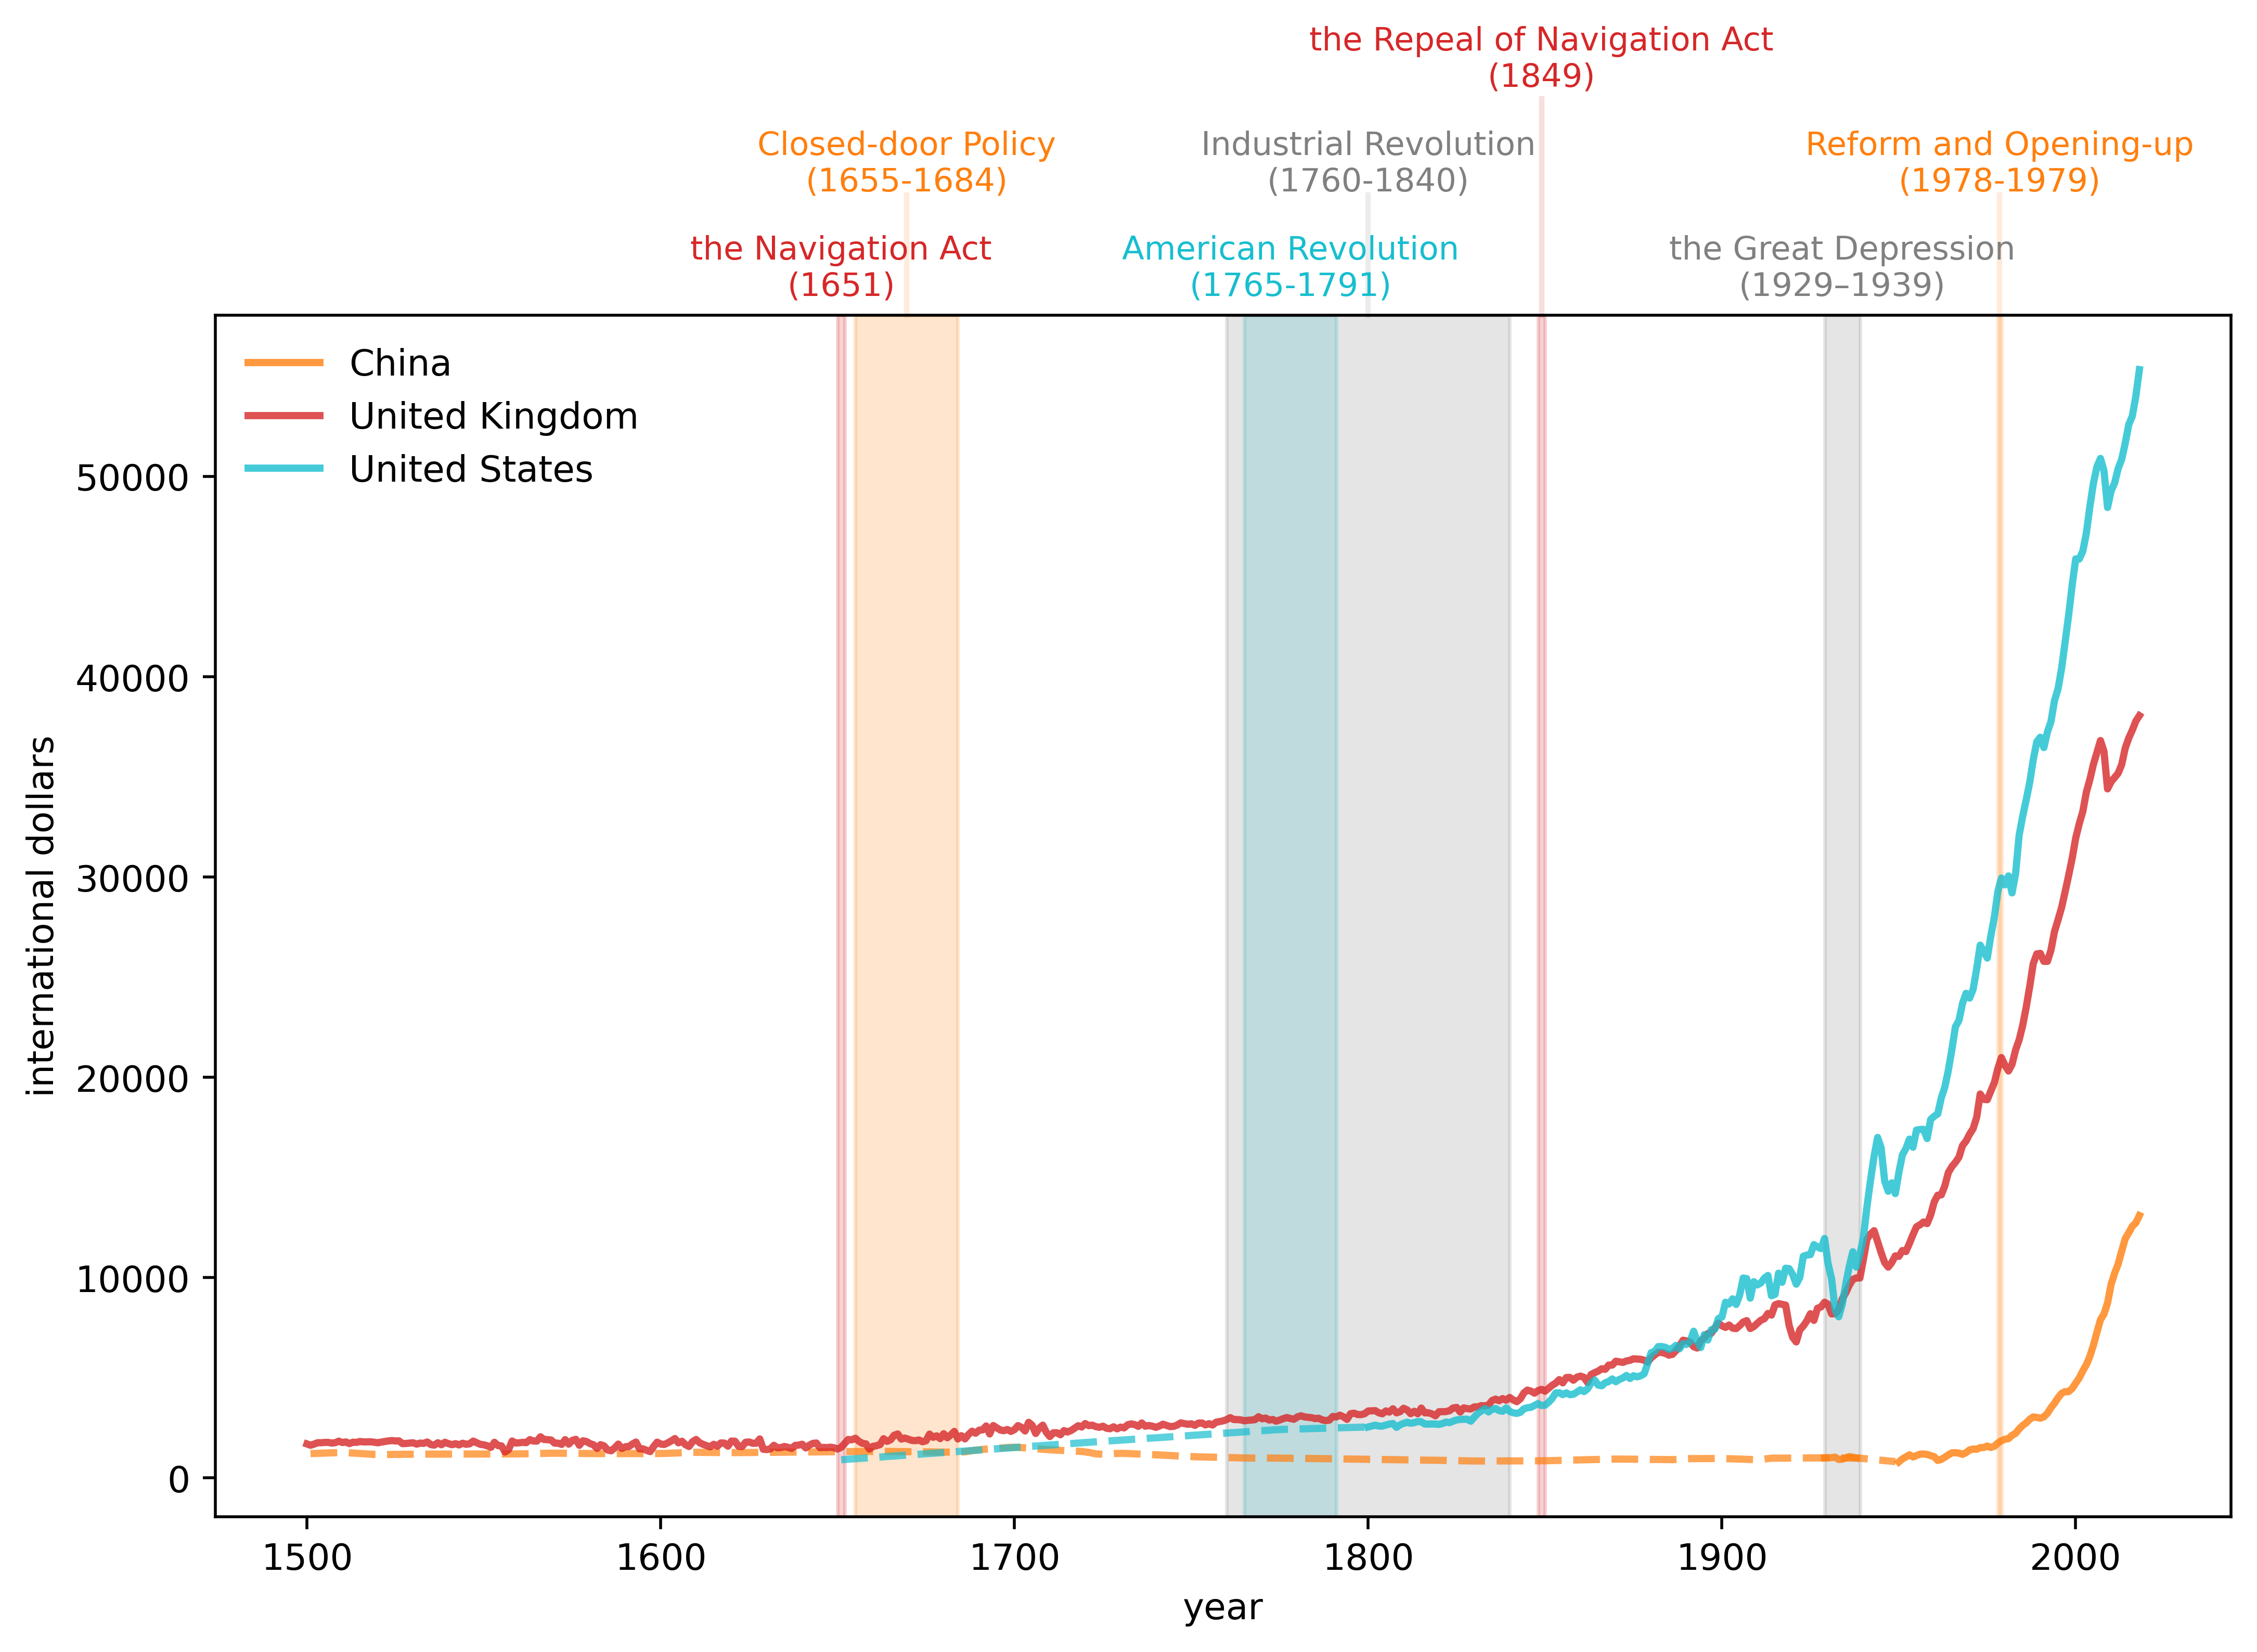

In [72]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=500, figsize=(10, 6))

country = ['CHN', 'GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          'Closed-door Policy\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

In [59]:
ax.get_ylim()

(-1927.78697, 58061.52637)

In [73]:
!pip install wbgapi
!pip install pandas-datareader

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import wbgapi as wb
import pandas_datareader.data as web

In [76]:
wb.series.info(q='GDP growth')

id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


In [77]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737
GRC,Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.879490,-9.316436,8.379944,5.557287
GBR,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,...,1.792322,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370
USA,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


In [78]:
wb.series.metadata.get('NY.GDP.MKTP.KD.ZG')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh

In [134]:
# Use the series ID retrieved before
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN','KOR'], 
            labels=True)

In [135]:
gdp_growth

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
KOR,"Korea, Rep.",NaN,6.935993,3.895273,9.020568,9.473825,7.318434,11.993957,9.079607,13.165768,...,3.164709,3.202454,2.809103,2.946882,3.159636,2.907404,2.243978,-0.709415,4.304735,2.612672
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737
GRC,Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.879490,-9.316436,8.379944,5.557287
GBR,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,...,1.792322,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370
USA,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


In [136]:
gdp_growth = gdp_growth.set_index('Country')

In [137]:
gdp_growth

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
Country,,,,,,,,,,,,,,,,,,,,,
"Korea, Rep.",NaN,6.935993,3.895273,9.020568,9.473825,7.318434,11.993957,9.079607,13.165768,14.561367,...,3.164709,3.202454,2.809103,2.946882,3.159636,2.907404,2.243978,-0.709415,4.304735,2.612672
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737
Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,11.563667,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.879490,-9.316436,8.379944,5.557287
United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,1.924097,...,1.792322,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


In [138]:
gdp_growth.columns #= gdp_growth.columns.str.replace('YR', '').astype(int)

Index(['YR1960', 'YR1961', 'YR1962', 'YR1963', 'YR1964', 'YR1965', 'YR1966',
       'YR1967', 'YR1968', 'YR1969', 'YR1970', 'YR1971', 'YR1972', 'YR1973',
       'YR1974', 'YR1975', 'YR1976', 'YR1977', 'YR1978', 'YR1979', 'YR1980',
       'YR1981', 'YR1982', 'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987',
       'YR1988', 'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR1999', 'YR2000', 'YR2001',
       'YR2002', 'YR2003', 'YR2004', 'YR2005', 'YR2006', 'YR2007', 'YR2008',
       'YR2009', 'YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015',
       'YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020', 'YR2021', 'YR2022'],
      dtype='object')

In [139]:
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)
gdp_growth.columns

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022],
      dtype='int32')

In [140]:
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
"Korea, Rep.",NaN,6.935993,3.895273,9.020568,9.473825,7.318434,11.993957,9.079607,13.165768,14.561367,...,3.164709,3.202454,2.809103,2.946882,3.159636,2.907404,2.243978,-0.709415,4.304735,2.612672
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737
Greece,NaN,13.203841,0.364811,11.844868,9.409677,10.768011,6.494502,5.669485,7.203719,11.563667,...,-2.515997,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.879490,-9.316436,8.379944,5.557287
United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,1.924097,...,1.792322,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


In [141]:
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    Plots a time series with recessions highlighted. 

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], label=country, **g_params)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if ylim != None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos,
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos,
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos,
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos,
            'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='-',lw=.4)
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

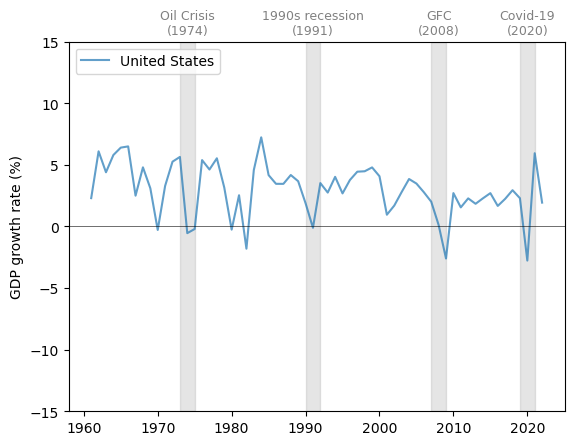

In [109]:
fig, ax = plt.subplots()

country = 'United States'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

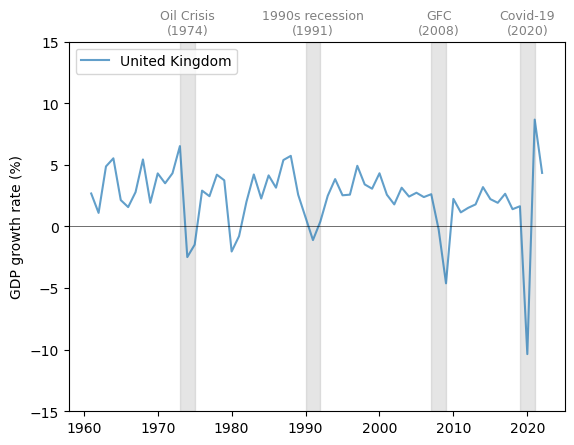

In [118]:
fig, ax = plt.subplots()

country = 'United Kingdom'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.savefig('BritCycle.png')

plt.show()

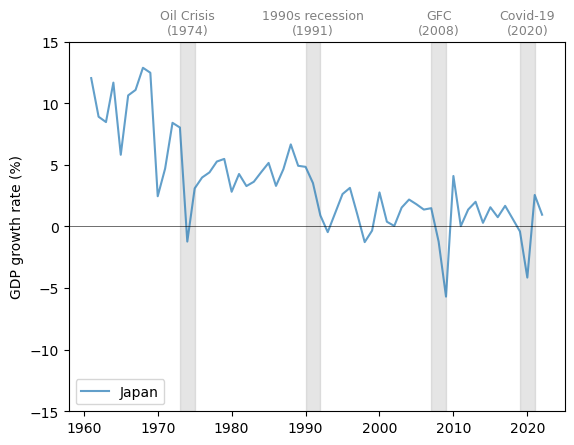

In [117]:
fig, ax = plt.subplots()

country = 'Japan'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()


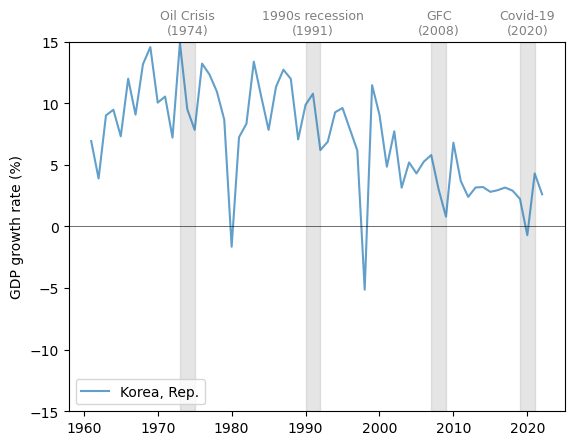

In [144]:
fig, ax = plt.subplots()

country = 'Korea, Rep.'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.savefig('KorGrowthRate.png')
plt.show()


In [120]:
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


In [132]:
data.loc[data['countrycode'] == 'KOR']

,countrycode,country,year,gdppc,pop
10924,KOR,Republic of Korea,1820,815.7743,9395.0
10925,KOR,Republic of Korea,1850,NaN,9545.0
10926,KOR,Republic of Korea,1870,820.3573,9753.0
10927,KOR,Republic of Korea,1890,NaN,9848.0
10928,KOR,Republic of Korea,1900,NaN,9896.0
...,...,...,...,...,...
11033,KOR,Republic of Korea,2014,34493.0000,50747.0
11034,KOR,Republic of Korea,2015,35269.0000,51015.0
11035,KOR,Republic of Korea,2016,36103.0000,51218.0
11036,KOR,Republic of Korea,2017,37093.2166,51426.0


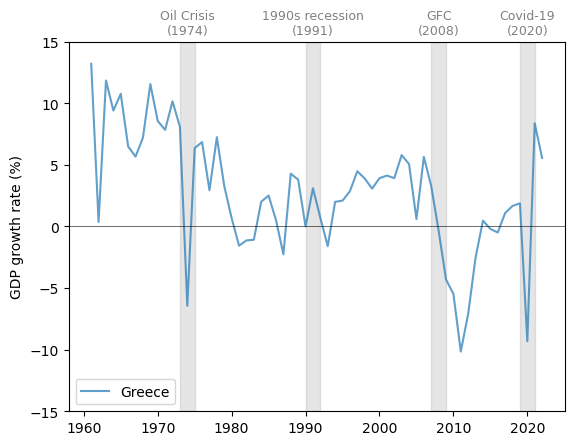

In [145]:
fig, ax = plt.subplots()

country = 'Greece'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

In [155]:
gdp_growth.loc['Korea, Rep.']

1960         NaN
1961    6.935993
1962    3.895273
1963    9.020568
1964    9.473825
          ...   
2018    2.907404
2019    2.243978
2020   -0.709415
2021    4.304735
2022    2.612672
Name: Korea, Rep., Length: 63, dtype: float64

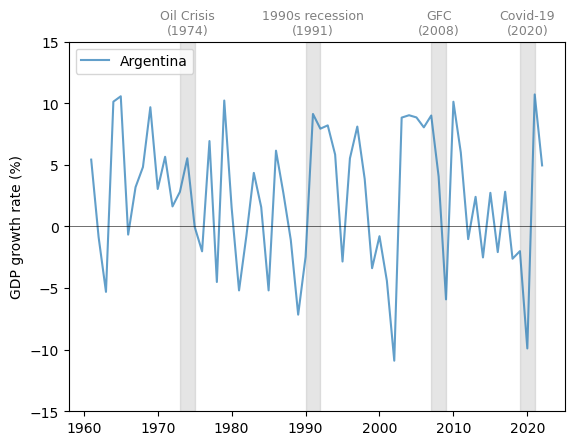

In [156]:
fig, ax = plt.subplots()

country = 'Argentina'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

In [157]:
start_date = datetime.datetime(1929, 1, 1)
end_date = datetime.datetime(1942, 6, 1)

unrate_history = web.DataReader('M0892AUSM156SNBR', 
                    'fred', start_date,end_date)
unrate_history.rename(columns={'M0892AUSM156SNBR': 'UNRATE'}, 
                inplace=True)

start_date = datetime.datetime(1948, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

unrate = web.DataReader('UNRATE', 'fred', 
                    start_date, end_date)

In [165]:
!pip install --upgrade quantecon interpolation numba numpy

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import random as rd

In [167]:
from interpolation import interp

ImportError: cannot import name 'generated_jit' from 'numba' (C:\Users\user\anaconda3\Lib\site-packages\numba\__init__.py)

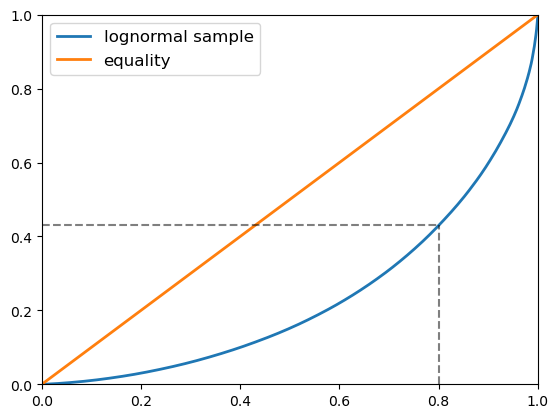

In [168]:
n = 2000
sample = np.exp(np.random.randn(n))

fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

plt.show()

In [169]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/main/SCF_plus/SCF_plus_mini.csv'
df = pd.read_csv(url)
df = df.dropna()
df_income_wealth = df

In [171]:
df_income_wealth.head()

,year,n_wealth,t_income,l_income,weights,nw_groups,ti_groups
0,1950,266933.75,55483.027,0.0,0.998732,50-90%,50-90%
1,1950,87434.46,55483.027,0.0,0.998732,50-90%,50-90%
2,1950,795034.94,55483.027,0.0,0.998732,Top 10%,50-90%
3,1950,94531.78,55483.027,0.0,0.998732,50-90%,50-90%
4,1950,166081.03,55483.027,0.0,0.998732,50-90%,50-90%


In [173]:
df = df_income_wealth 

varlist = ['n_wealth',    # net wealth 
           't_income',    # total income
           'l_income']    # labor income

years = df.year.unique()

# Create lists to store Lorenz data

F_vals, L_vals = [], []

for var in varlist:
    # create lists to store Lorenz curve data
    f_vals = []
    l_vals = []
    for year in years:

        # Repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] )) 
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        # Shuffle the sequence to improve the plot
        rd.shuffle(y)    
               
        # calculate and store Lorenz curve data
        f_val, l_val = qe.lorenz_curve(y)
        f_vals.append(f_val)
        l_vals.append(l_val)
        
    F_vals.append(f_vals)
    L_vals.append(l_vals)

f_vals_nw, f_vals_ti, f_vals_li = F_vals
l_vals_nw, l_vals_ti, l_vals_li = L_vals

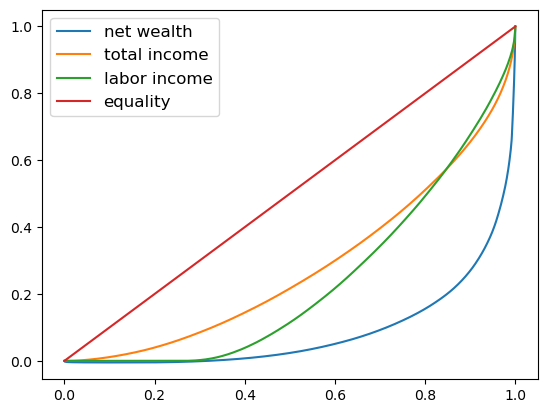

In [177]:
fig, ax = plt.subplots()

ax.plot(f_vals_nw[0], l_vals_nw[0], label=f'net wealth')
ax.plot(f_vals_ti[0], l_vals_ti[0], label=f'total income')
ax.plot(f_vals_li[0], l_vals_li[0], label=f'labor income')
ax.plot(f_vals_nw[0], f_vals_nw[0], label=f'equality')

ax.legend(fontsize=12)   
plt.show()